Model Performance:
Mean Absolute Error (MAE): 126656.28626064956
Mean Squared Error (MSE): 23713788121.127605
Root Mean Squared Error (RMSE): 153992.81840763745


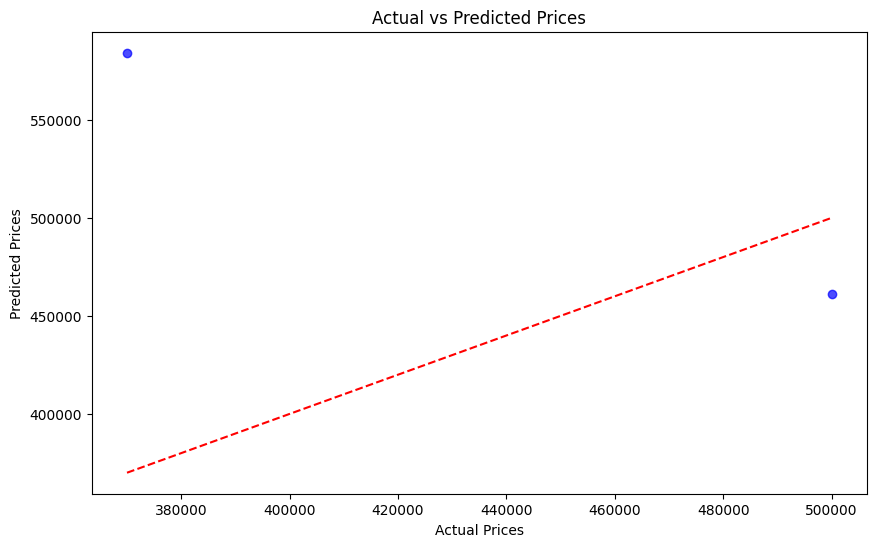

['car_price_prediction_model.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib

# Create the dataset (replace this part with loading your actual dataset)
data = {
    'car_name': ['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI', 'Honda City 2006-2010', 'Hyundai i20 Sportz', 'Maruti Swift VXI BSIII', 'Tata Indigo CR4', 'Hyundai Verna CRDi SX', 'Maruti Swift Dzire ZDi', 'Honda Civic 2006-2010', 'BMW X1 20d'],
    'year': [2014, 2014, 2006, 2010, 2007, 2013, 2007, 2009, 2008, 2012],
    'selling_price': [450000, 370000, 158000, 225000, 130000, 290000, 135000, 382000, 500000, 800000],
    'km_driven': [145500, 120000, 140000, 127000, 120000, 25000, 119000, 120000, 90000, 70000],
    'fuel': ['Diesel', 'Diesel', 'Petrol', 'Diesel', 'Petrol', 'Diesel', 'Diesel', 'Diesel', 'Petrol', 'Diesel'],
    'seller_type': ['Individual', 'Individual', 'Individual', 'Individual', 'Individual', 'Individual', 'Individual', 'Individual', 'Individual', 'Dealer'],
    'transmission': ['Manual', 'Manual', 'Manual', 'Manual', 'Manual', 'Manual', 'Manual', 'Manual', 'Manual', 'Automatic'],
    'owner': ['First Owner', 'Second Owner', 'Third Owner', 'First Owner', 'First Owner', 'First Owner', 'Fourth Owner', 'First Owner', 'First Owner', 'Second Owner'],
    'mileage': [23.4, 21.14, 17.7, 23.0, 16.1, 23.57, 16.8, 19.3, 15.5, 18.0],
    'engine_capacity': ['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1396 CC', '1493 CC', '1248 CC', '1799 CC', '1995 CC'],
    'max_power': ['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp', '70 bhp', '110 bhp', '73.9 bhp', '130 bhp', '148 bhp'],
    'torque': ['190Nm@2000rpm', '250Nm@1500-2500rpm', '12.7@2700rpm', '22.4 kgm @1750-2750rpm', '11.5@4500rpm', '140Nm@1800-3000rpm', '24@1900-2750rpm', '190Nm@2000rpm', '174Nm@4000rpm', '350Nm@1750-3000rpm'],
    'seats': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Preprocessing
# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Convert 'engine_capacity' to numeric (extract only the number)
df['engine_capacity'] = df['engine_capacity'].str.extract('(\d+)').astype(float)

# Convert 'max_power' to numeric (extract only the number)
df['max_power'] = df['max_power'].str.extract('(\d+\.?\d*)').astype(float)

# Extract numeric part from 'torque'
df['torque'] = df['torque'].str.extract('(\d+\.?\d*)').astype(float)

# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner', 'car_name'], drop_first=True)

# Define features (X) and target (y)
X = df.drop('selling_price', axis=1)  # Replace 'selling_price' with the actual column name for car price
y = df['selling_price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Save the model (optional)
joblib.dump(model, 'car_price_prediction_model.pkl')


# New section

# New section